In [32]:
import pandas as pd;
import numpy as np;
from matplotlib import pyplot as plt;

df = pd.read_csv("./train.csv");
corr = df.corr();
corr.style.background_gradient(cmap='coolwarm')

AttributeError: 'Series' object has no attribute 'asType'

In [65]:
from sklearn.preprocessing import OneHotEncoder

def one_hot(df, column_name):
    dummies = pd.get_dummies(df[column_name], prefix=column_name, drop_first=True)
    df = df.drop(column_name, 1);
    df = pd.concat([df, dummies], 1);
    return df

x = df.drop(["Name", "Survived", "Ticket", "Cabin", "PassengerId"], 1)
x["Age"].fillna(0, inplace=True);
x = one_hot(x, "Sex");
x = one_hot(x, "Embarked");
x.head(10)

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0
2,3,26.0,0,0,7.9250,0,0,1
3,1,35.0,1,0,53.1000,0,0,1
4,3,35.0,0,0,8.0500,1,0,1
5,3,0.0,0,0,8.4583,1,1,0
6,1,54.0,0,0,51.8625,1,0,1
7,3,2.0,3,1,21.0750,1,0,1
8,3,27.0,0,2,11.1333,0,0,1
9,2,14.0,1,0,30.0708,0,0,0


In [70]:
from sklearn import tree;
from sklearn.model_selection import cross_validate;

y = df["Survived"]
clf = tree.DecisionTreeClassifier(max_depth=3)
# clf.fit(x, y)
cross_validate(clf, x, y, scoring=["accuracy"])


{'fit_time': array([0.00175691, 0.00151849, 0.00178218, 0.00202012, 0.00230122]),
 'score_time': array([0.00086594, 0.00092387, 0.00107574, 0.00127649, 0.00142145]),
 'test_accuracy': array([0.81564246, 0.80337079, 0.80898876, 0.78651685, 0.81460674])}

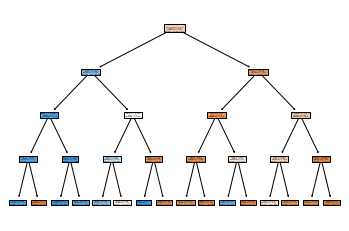

In [58]:
dot_data = tree.plot_tree(clf, feature_names=x.columns, filled=True)